In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Load data
datatrain = pd.read_excel("trainingdata.xlsx")
data = pd.read_excel("finaldata.xlsx")
X_train = datatrain.drop(columns=['quarter','gdp_growth_q'])  # Adjust as per your dataset
y_train=datatrain['gdp_growth_q']
datatest=pd.read_excel("testdata.xlsx")
lagdata=pd.read_excel("withlag.xlsx")
X_test = datatest.drop(columns=['quarter','gdp_growth_q'])  # Adjust as per your dataset
y_test=datatest['gdp_growth_q']



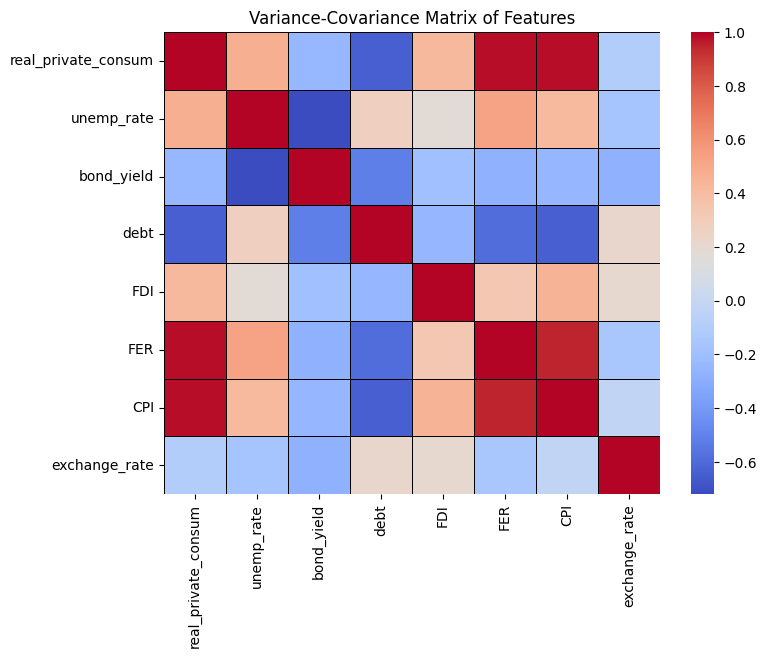

In [93]:
cov_matrix=X_train.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=False, cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='black')
plt.title('Variance-Covariance Matrix of Features')
plt.show()

In [94]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


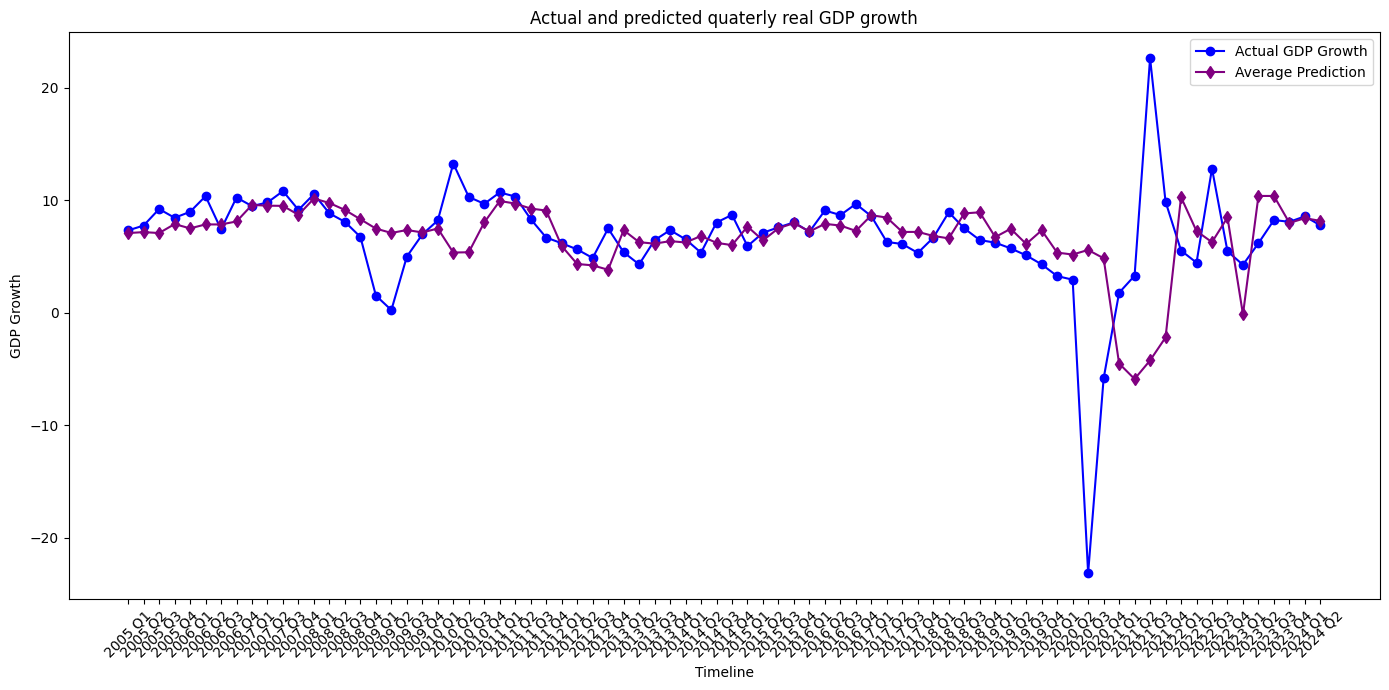

In [87]:
#WITH LAG__________________________________________________________________________________________________-
# Assuming 'Year', 'Quarter', 'GDP_Growth', and other feature columns are available in the DataFrame `data`
lagdata['Timeline'] = lagdata['Year'].astype(str) + ' Q' + lagdata['Qua'].astype(str)

# Set up lists to collect predictions
rf_predictions = []
xgb_predictions = []
actual_values = []
avg_predictions=[]

# Rolling forecast from 2011 onwards
for year in range(2005, 2025):  # Change this range as needed
    # Train-test split for each year
    ltdata = lagdata[lagdata['Year'] < year]
    ltsdata = lagdata[lagdata['Year'] == year]
    

    X_lt = ltdata.drop(columns=['Qua','quarter','gdp_growth_q','Year','Timeline'])
    y_lt = ltdata['gdp_growth_q']
    X_lts = ltsdata.drop(columns=['Qua','quarter','gdp_growth_q','Year','Timeline'])
    y_lts = ltsdata['gdp_growth_q']
    
    #X_t = tdata.select_dtypes(include=[np.number]).drop(columns=['gdp_growth_q', 'Year', 'quarter'])
    #y_t = tdata['gdp_growth_q']
    #X_ts = tsdata.select_dtypes(include=[np.number]).drop(columns=['gdp_growth_q', 'Year', 'quarter'])
    #y_ts = tsdata['gdp_growth_q']

    # Train models
    rf_model = RandomForestRegressor(n_estimators=200, random_state=100)
    rf_model.fit(X_lt, y_lt)
    xgb_model = XGBRegressor(n_estimators=200, random_state=100)
    xgb_model.fit(X_lt, y_lt)
    
    # Predict and store results
    rf_pred = rf_model.predict(X_lts)
    xgb_pred = xgb_model.predict(X_lts)
    avg_pred=(rf_pred + xgb_pred) / 2 
    
    rf_predictions.extend(rf_pred)
    xgb_predictions.extend(xgb_pred)
    actual_values.extend(y_lts.values)
    avg_predictions.extend(avg_pred)

#lagdata['avg_predictions'] = [(rf + xgb) / 2 for rf, xgb in zip(rf_predictions, xgb_predictions)]
#lagdata['Timeline'] = lagdata['Year'].astype(str) + ' Q' + lagdata['Qua'].astype(str)
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(lagdata[lagdata['Year'] >= 2005]['Timeline'], actual_values, label='Actual GDP Growth', color='blue', marker='o')
#plt.plot(lagdata[lagdata['Year'] >= 2005]['Timeline'], rf_predictions, label='Random Forest Prediction', color='green', linestyle='--', marker='x')
#plt.plot(lagdata[lagdata['Year'] >= 2005]['Timeline'], xgb_predictions, label='XGBoost Prediction', color='red', linestyle='-.', marker='s')
plt.plot(lagdata[lagdata['Year'] >= 2005]['Timeline'], avg_predictions, label='Average Prediction', color='purple', linestyle='-', marker='d')

plt.xlabel('Timeline')
plt.ylabel('GDP Growth')
plt.title('Actual and predicted quaterly real GDP growth')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
